In [29]:
from numpy.linalg import inv, solve
from numpy import zeros, dot, array, append
import numpy as np

In [3]:
def set_matrix(nodes=5, geometry="cartesian", D=9.0, w=10.0, sigma=0.15):
    deltaX = w / (nodes - 1.0)
    n = nodes - 1
    
    matrix = zeros((n,n))
    if geometry == "cartesian":
        matrix[0][0] = D / deltaX ** 2.0 + 0.5 * sigma
        matrix[0][1] = -1.0 * D / deltaX ** 2.0
        for i in range(1, n-1):
            matrix[i][i] = 2 * D / deltaX ** 2 + sigma
            matrix[i][i-1] = -1.0 * D / deltaX ** 2
            matrix[i][i+1] = -1.0 * D / deltaX ** 2
        matrix[n-1][n-1] = 2 * D / deltaX ** 2.0 + sigma
        matrix[n-1][n-2] = -1.0 * D / deltaX ** 2.0

    return matrix

In [45]:
def flux(nodes=5, geometry="cartesian", D=9.0, w=10.0, sigma=0.15):
    n = nodes - 1
    A = set_matrix(nodes=nodes, geometry=geometry, D=D, w=w, sigma=sigma)
    S_vector = zeros(n)
    S = 10.0 ** 8
    S_vector[0] = S / (2.0 * w / n)
    
    return append(dot(inv(A), S_vector), 0.0)

In [46]:
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt

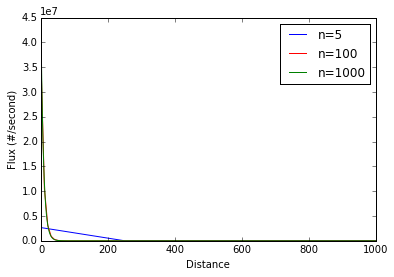

In [59]:
def x(n):
    return np.linspace(0, 1000, n)

plt.figure(1)

plt.subplot(111)
plt.plot(x(5), flux(nodes=5, w=1000.0), 'b', label="n=5")
plt.plot(x(100), flux(nodes=100, w=1000.0), 'r', label="n=100")
plt.plot(x(1000), flux(nodes=1000, w=1000.0), 'g', label="n=1000")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

plt.show()

In [ ]:
np.linspace(0, 10, 10)